## Setup and imports
In this section we shall install the various dependencies that are required to run the analyzer

In [33]:
%%capture
%pip install matplotlib
%pip install numpy

In [64]:
import json
import matplotlib.pyplot as plt
from pprint import pprint
from decimal import Decimal
from operator import truediv
import numpy

## Reading the JSON Logs

In [ ]:
## Displaying Loaded Metadata
def showMetaDataLog(jsonLog):
    try:
        print("Compression Run for ",jsonLog["Compressor"])
        print("Run on ",jsonLog["Date"])
        print("Raw Event File ",jsonLog["Filename"])
        print("Events Compressed in Run ",jsonLog["eventCount"])
        print("Loaded Compressor Config \n",jsonLog["compressorConfig"])
    except Exception as e:
        print(e)

# - These Reports are to be shown for all the files

### Compression File

In [13]:
compressionLogFile = open("../logTest.json")
compression_log = json.load(compressionLogFile)
showMetaDataLog(compression_log)

Compression Run for  ZSTD COmpressor
Run on  11/06/2023
Raw Event File  /home/osboxes/faser-daq/gsoc_data/Faser-Physics-009015-00015.raw
Events Compressed in Run  10
Loaded Compressor Config 
 Compressor:ZSTD
compressionLevel:3



### Decompression File

In [14]:
decompressionLogFile = open("../logTest_decompression.json")
decompression_log = json.load(decompressionLogFile)
showMetaDataLog(decompression_log)

Compression Run for  ZSTD COmpressor:: Decompression Run 
Run on  11/06/2023
Raw Event File  /home/osboxes/faser-daq/gsoc_data/Faser-Physics-009015-00015.raw
Events Compressed in Run  10
Loaded Compressor Config 
 Compressor:ZSTD
compressionLevel:3



## Analysis

### Compression Run

In [69]:
eventList = compression_log["evdata"] # The event List
# No We design a filter dictionary to take up events based on filters
# Leave Empty if All Events are to be considered
eventListAnalysis = []
filter_dict = {
    #  "trig": "2"
}
if len(filter_dict.keys()) != 0:
    print("Filtering Events based on")
    pprint(filter_dict)
    for filter_field in filter_dict.keys():
        for event in eventList:
            if event["eventHeader"][filter_field] == filter_dict[filter_field]:
                eventListAnalysis.append(event)
else:
    print("No Filter given - Analysis for all events")
    eventListAnalysis = eventList
# Populate Metrics and Show preliminary results
compressionRatioList = [Decimal(event["compressionRatio"]) for event in eventListAnalysis]
timeTakenList = [Decimal(event["timeTaken"]) for event in eventListAnalysis]
inputSizeList = [Decimal(event["inputSize"]) for event in eventListAnalysis]
outputSizeList = [Decimal(event["outputSize"]) for event in eventListAnalysis]

compressionSpeedList  = list(map(truediv,inputSizeList,timeTakenList))
avaerageCompressionRatio = numpy.average(compressionRatioList)
avaerageCompressionSpeed = numpy.average(compressionSpeedList)
averageCompressionTime = numpy.average(timeTakenList)
x_axis = range(len(eventListAnalysis))


No Filter given - Analysis for all events


Total Events:   10
Total Events for Analysis:    10
The Average Compression Ratio achived is:   2.044495
The Average Compression Speed achived is:   132.2655957675988215456445675
The Average Compression Time achived is:   179.4


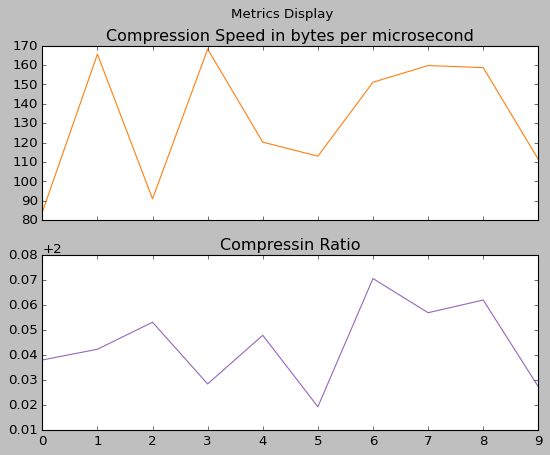

In [70]:
## Plotiing Metrics
plt.style.use('classic')
fig, axs = plt.subplots(2,sharex=True)
fig.suptitle("Metrics Display")
axs[0].set_title("Compression Speed in bytes per microsecond")
axs[0].plot(x_axis,compressionSpeedList,'tab:orange')
axs[1].set_title("Compressin Ratio")
axs[1].plot(x_axis,compressionRatioList,'tab:purple')
print("Total Events:  ",len(eventList))
print("Total Events for Analysis:   ",len(eventListAnalysis))
print("The Average Compression Ratio achived is:  ",avaerageCompressionRatio)
print("The Average Compression Speed achived is:  ",avaerageCompressionSpeed)
print("The Average Compression Time achived is:  ",averageCompressionTime)

### Decompression Run

In [77]:
eventList = decompression_log["evdata"] # The event List
# No We design a filter dictionary to take up events based on filters
# Leave Empty if All Events are to be considered
eventListAnalysis = []
filter_dict = {
    #  "trig": "2"
}
if len(filter_dict.keys()) != 0:
    print("Filtering Events based on")
    pprint(filter_dict)
    for filter_field in filter_dict.keys():
        for event in eventList:
            if event["eventHeader"][filter_field] == filter_dict[filter_field]:
                eventListAnalysis.append(event)
else:
    print("No Filter given - Analysis for all events")
    eventListAnalysis = eventList
# Populate Metrics and Show preliminary results
timeTakenList = [Decimal(event["timeTaken"]) for event in eventListAnalysis]
inputSizeList = [Decimal(event["inputSize"]) for event in eventListAnalysis]
outputSizeList = [Decimal(event["outputSize"]) for event in eventListAnalysis]

decompressionSpeedList  = list(map(truediv,outputSizeList,timeTakenList))

avaerageDecompressionSpeed = numpy.average(decompressionSpeedList)
averageDecompressionTime = numpy.average(timeTakenList)
x_axis = range(len(eventListAnalysis))


No Filter given - Analysis for all events


Total Events:   10
Total Events for Analysis:    10
The Average Compression Speed achived is:   127.362033686329766063389859
The Average Compression Time achived is:   633.4


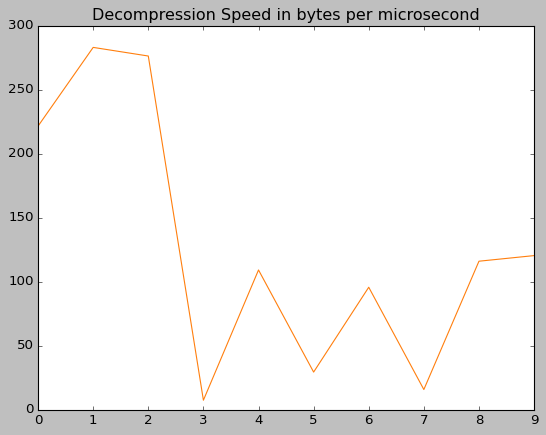

In [79]:
## Plotiing Metrics
plt.style.use('classic')
plt.title("Decompression Speed in bytes per microsecond")
plt.plot(x_axis,decompressionSpeedList,'tab:orange')
print("Total Events:  ",len(eventList))
print("Total Events for Analysis:   ",len(eventListAnalysis))
print("The Average Compression Speed achived is:  ",avaerageDecompressionSpeed)
print("The Average Compression Time achived is:  ",averageDecompressionTime)

## Closing and Cleaning Up

In [15]:
compressionLogFile.close()
decompressionLogFile.close()